In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

In [51]:
def ebfe_fit(Zs, beta, alpha, b_prime):
    Z1, Z2 = Zs.T
    return(-beta/2*(Z1**(7/3)+Z2**(7/3))+2*alpha+2*b_prime*Z1*Z2)

# # def ebfe_fit_gamma(Zs, beta, alpha, gamma, b_prime):
def ebfe_fit_gamma(Zs, beta, gamma, b_prime):
    Z1, Z2 = Zs.T
    return(-beta/2*(np.power(Z1, gamma)+np.power(Z2, gamma))+2*b_prime*Z1*Z2)

def get_r2(predicted, ref):
    return(1 - ((predicted-ref)**2).sum()/((ref-ref.mean())**2).sum())

In [ ]:
def ebfe_fit_gamma(Zs, *args):
    Z1, Z2 = Zs.T
    return(- args[0] /2*(np.power(Z1, args[1])+np.power(Z2, args[1]))+2*args[2]*Z1*Z2)

In [45]:
class BDE():
    def __init__(self, energies, nuc_charges):
        # define energies
        self.bde = -energies[:,0]*2600
        self.bfe = energies[:,0]*2600
        self.ebfe = energies[:,1]*2600
        self.nbfe = energies[:,2]*2600
        
        # define charge combinations Z1, Z2
        self.nuc_charges = nuc_charges
#         if row == 2:
#             self.nuc_charges = [6, 7, 8, 9]
#         elif row == 3:
#             self.nuc_charges = [14, 15, 16, 17]
#         elif row == 4:
#             self.nuc_charges = [32, 33, 34, 35]
        
        self.xdata = []
        for i in range(len(self.nuc_charges)):
            for j in range(i, len(self.nuc_charges)):
                self.xdata.append([self.nuc_charges[i], self.nuc_charges[j]])
        self.xdata = np.array(self.xdata)
        
    def fit(self, model):
        self.param = curve_fit(model, self.xdata, self.ebfe)
        self.ebfe_fitted = model(self.xdata, self.param[0][0], self.param[0][1], self.param[0][2])
        self.bde_fitted = -(self.ebfe_fitted + self.nbfe)
        self.mae = np.abs(self.bde_fitted-self.bde).mean()
        

In [63]:
efiles = ['/data/sahre/projects/atomic-energies/data/bonding_trends/pbe0_data/row_2/energies_single.txt', 
          '/data/sahre/projects/atomic-energies/data/bonding_trends/pbe0_data/row_3/energies_single.txt',
          '/data/sahre/projects/atomic-energies/data/bonding_trends/pbe0_data/row_4/energies_single.txt']

nuc_charges = [[6, 7, 8, 9], [14, 15, 16, 17], [32, 33, 34, 35]]
systems = {'row_2':0, 'row_3':0,'row_4':0,'all':0,}

for ef, nc, k in zip(efiles, nuc_charges, systems.keys()):
    systems[k] = BDE(np.loadtxt(ef), nc)
    


In [65]:
for k in systems.keys():
    systems[k].fit(ebfe_fit_gamma)
    print(systems[k].mae)
#     plt.plot()

84.8349424639253
47.20717302347666
11.55127369426773


<ipython-input-51-de48ccb101c0>:8: RuntimeWarning: overflow encountered in power
  return(-beta/2*(np.power(Z1, gamma)+np.power(Z2, gamma))+2*b_prime*Z1*Z2)


AttributeError: 'int' object has no attribute 'fit'

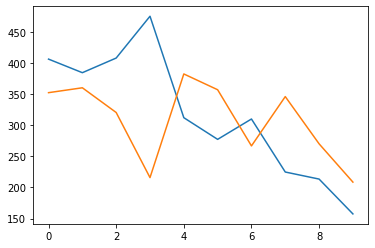

In [70]:
plt.plot(systems['row_2'].bde)
plt.plot(systems['row_2'].bde_fitted)

In [71]:
systems['row_2'].param

(array([-7.02951801e-02,  4.33172426e+00, -4.91254115e+02]),
 array([[  1.1974545 ,   6.85129878,  12.11361059],
        [  6.85129878,  39.21912216,  69.12077278],
        [ 12.11361059,  69.12077278, 124.51470763]]))

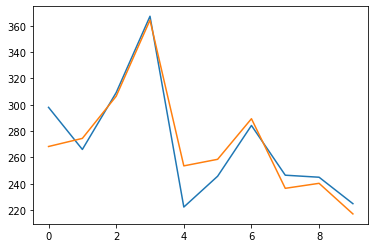

In [68]:
plt.plot(systems['row_4'].bde)
plt.plot(systems['row_4'].bde_fitted)

In [72]:
systems['row_4'].param

(array([  30.80294176,    1.96529294, -277.75437389]),
 array([[1.76460345e+01, 1.68369944e-02, 8.62419793e+00],
        [1.68369944e-02, 8.34820368e-05, 1.14617961e-02],
        [8.62419793e+00, 1.14617961e-02, 4.36997564e+00]]))

In [53]:
BDE_2.mae

4.117130841252345

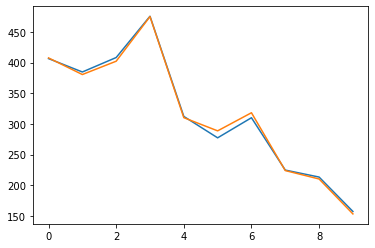

In [54]:
plt.plot(BDE_2.bde)
plt.plot(BDE_2.bde_fitted)

In [ ]:
out_all

In [ ]:
frag_types_2 = ['C', 'N', 'O', 'F']
comps_2 = []
for i in range(len(frag_types_2)):
    for j in range(i, len(frag_types_2)):
        comps_2.append(frag_types_2[i]+ frag_types_2[j])

frag_types_3 = ['Si', 'P', 'S', 'Cl']
comps_3 = []
for i in range(len(frag_types_3)):
    for j in range(i, len(frag_types_3)):
        comps_3.append(frag_types_3[i]+ frag_types_3[j])

frag_types_4 = ['Ge', 'As', 'Se', 'Br']
comps_4 = []
for i in range(len(frag_types_4)):
    for j in range(i, len(frag_types_4)):
        comps_4.append(frag_types_4[i]+ frag_types_4[j])

In [ ]:
frag_types_2 = ['C', 'N', 'O', 'F']
comps_2 = []
for i in range(len(frag_types_2)):
    for j in range(i, len(frag_types_2)):
        comps_2.append(frag_types_2[i]+ frag_types_2[j])

frag_types_3 = ['Si', 'P', 'S', 'Cl']
comps_3 = []
for i in range(len(frag_types_3)):
    for j in range(i, len(frag_types_3)):
        comps_3.append(frag_types_3[i]+ frag_types_3[j])

frag_types_4 = ['Ge', 'As', 'Se', 'Br']
comps_4 = []
for i in range(len(frag_types_4)):
    for j in range(i, len(frag_types_4)):
        comps_4.append(frag_types_4[i]+ frag_types_4[j])

In [ ]:
plt.rcParams['font.size'] = 12
plt.rcParams["figure.figsize"] = [15,4]

fig, ax = plt.subplots(1,3)

ax[0].plot(comps_2, ref_bde_2, '-o', label = 'ref')
# ax[0].plot(comps_2, fit_2, '-o', label = f'fit MAE {np.round(mae_2,2)}\n$r^2$ = {np.round(r2_2,8)}')
ax[0].plot(comps_2, fit_2, '-o', label = f'fit MAE {np.round(mae_2,2)}')
ax[0].legend()


ax[1].plot(comps_3, ref_bde_3, '-o', label = 'ref')
ax[1].plot(comps_3, fit_3, '-o', label = f'fit MAE {np.round(mae_3,2)}')
# ax[1].plot(comps_3, fit_3, '-o', label = f'fit MAE {np.round(mae_3,2)}\n$r^2$ = {np.round(r2_3,8)}')
ax[1].legend()

ax[2].plot(comps_4, ref_bde_4, '-o', label = 'ref')
ax[2].plot(comps_4, fit_4, '-o', label = f'fit MAE {np.round(mae_4,2)}')
# ax[2].plot(comps_4, fit_4, '-o', label = f'fit MAE {np.round(mae_4,2)}\n$r^2$ = {np.round(r2_4,8)}')
ax[2].legend()

ax[0].set_ylabel('BDE (kJ/mol)')
plt.tight_layout()

In [ ]:
ref_bde_236

In [ ]:
plt.plot([1.42, 1.75, 2, 2.12, 2.25, 2.36], mae_all, '-o')

In [ ]:
out_all = curve_fit(ebfe_fit, xdata_all, ebfe_exp_all)
fit_all = -(ebfe_fit(xdata_all, out_all[0][0], out_all[0][1], out_all[0][2]) + nbfe_all)
mae_all = np.abs(fit_all-ref_bde_all).mean()

plt.plot(ref_bde_all)
plt.plot(fit_all)

In [ ]:
mae_all

In [ ]:
plt.plot(ebfe_exp_all, '-o')
plt.plot(ebfe_fit(xdata_all, out_all[0][0], out_all[0][1], out_all[0][2]), '-o')

In [ ]:
# mean distance between heavy atoms
# needed for nuclear repulsion calculation
import glob
from ase.units import Bohr
import ase.io as aio

system = 'diatomics'
bond_type = 'single'

structures = []
for row in ['row_2', 'row_3', 'row_4']:
    structures.extend(glob.glob(f'/data/sahre/projects/atomic-energies/data/bonding_trends/pbe0_data/{row}/{system}_{bond_type}/*_opt.xyz'))
dist = []
for s in structures:
    mol = aio.read(s)
    dist.append(mol.get_distance(0, 1))
dist = np.array(dist)
mean_dist = dist.mean()/Bohr

e_nuc = []
for x in xdata_all:
    e_nuc.append(x[0]*x[1]/mean_dist)
e_nuc = np.array(e_nuc)

In [ ]:
mean_dist*Bohr

In [ ]:
bfe = energies_all[:,0].copy()

ebfe_adjusted = (bfe-e_nuc)*2600
nbfe_adjusted = e_nuc*2600
ref_bde_adjusted = -bfe*2600

In [ ]:
fig, ax = plt.subplots(1,3)
ax[0].plot(ref_bde_all)
ax[0].plot(ref_bde_adjusted)

ax[1].plot(ebfe_exp_all)
ax[1].plot(ebfe_adjusted)

ax[2].plot(nbfe_all)
ax[2].plot(nbfe_adjusted)

In [ ]:
out_all = curve_fit(ebfe_fit, xdata_all, ebfe_adjusted)
fit_all = -(ebfe_fit(xdata_all, out_all[0][0], out_all[0][1], out_all[0][2]) + nbfe_adjusted)
mae_all = np.abs(fit_all-ref_bde_adjusted).mean()

comps_all = comps_2.copy()
comps_all.extend(comps_3)
comps_all.extend(comps_4)
plt.rcParams['figure.figsize'] = [20,6]
plt.plot(comps_all, ref_bde_adjusted, label = 'ref')
plt.plot(comps_all, fit_all, '-o', label = f'fit MAE = {np.round(mae_all, 2)}')
plt.ylabel('BDE (kJ/mol)')
plt.legend()

In [ ]:
n = 10
plt.plot(ebfe_adjusted[:n])
plt.plot(ebfe_fit(xdata_all, out_all[0][0], out_all[0][1], out_all[0][2])[:n])



In [ ]:
beta = []
alpha = []
b_prime = []
for i in [out_2, out_3, out_4]:
    beta.append(i[0][0])
    alpha.append(i[0][1])
    b_prime.append(i[0][2])

In [ ]:
plt.plot(b_prime, '-o')

In [ ]:
ebfe_fit(xdata_all, out_all[0][0], out_all[0][1], out_all[0][2])[:n]-ebfe_adjusted[:n]

In [ ]:
out_all_gamma = curve_fit(ebfe_fit_gamma, xdata_all, ebfe_adjusted)

fit_all_gamma = -(ebfe_fit_gamma(xdata_all, out_all_gamma[0][0], out_all_gamma[0][1], out_all_gamma[0][2], out_all_gamma[0][3]) + nbfe_adjusted)
mae_all_gamma = np.abs(fit_all_gamma-ref_bde_adjusted).mean()

In [ ]:
out_all_gamma

In [ ]:
comps_all = comps_2.copy()
comps_all.extend(comps_3)
comps_all.extend(comps_4)
plt.rcParams['figure.figsize'] = [20,6]
plt.plot(ref_bde_adjusted, label = 'ref')

plt.plot(comps_all, fit_all, '-o', label = f'fit MAE = {np.round(mae_all, 2)}')


plt.plot(fit_all_gamma, '-o', label = f'fit2 MAE = {np.round(mae_all_gamma, 2)}')
plt.legend()
plt.ylabel('BDE (kJ/mol)')


In [ ]:
mae_all_gamma

In [ ]:
p0 = [36.66033465, -146.85897595, 2.00090536, -330.96945723, 1.0]
out_all_cprime = curve_fit(ebfe_fit_cprime, xdata_all, ebfe_adjusted, p0=p0)

fit_all_cprime = -(ebfe_fit_cprime(xdata_all, out_all_cprime[0][0], out_all_cprime[0][1], out_all_cprime[0][2], out_all_cprime[0][3], out_all_cprime[0][4]) + nbfe_adjusted)
mae_all_cprime = np.abs(fit_all_cprime-ref_bde_adjusted).mean()

In [ ]:
out_all_gamma[0]

In [ ]:
out_all_cprime[0]

In [ ]:
plt.plot(ref_bde_adjusted)
plt.plot(fit_all_cprime, '-o')

In [ ]:
ve = [4, 5, 6, 7]
ve_pairs = []
for i in range(len(ve)):
    for j in range(len(ve)):
        ve_pairs.append(f'{ve[i]}, {ve[j]}')

In [ ]:
ve_pairs

In [ ]:
def get_electronic_trends(energy):
    concat_en = np.concatenate((energy[:,1][[0, 1, 2, 3]],
        energy[:,1][[1, 4, 5, 6]],
        energy[:,1][[2, 5, 7, 8]],
        energy[:,1][[3, 6, 8, 9]]))
    return(concat_en)
plt.rcParams['font.size']=18
plt.plot(ve_pairs, get_electronic_trends(energies_2), '-o', label = 'row 2')
plt.plot(get_electronic_trends(energies_3), '-o', label = 'row 3')
plt.plot(get_electronic_trends(energies_4), '-o', label = 'row 4')
plt.xlabel(r'$N_{\rm{ve}, 1}, N_{\rm{ve}, 2}$')
plt.ylabel('EBFE (Ha)')
plt.legend()

In [ ]:
plt.plot(ref_bde_2, '-o', label = 'row 2')
plt.plot(ref_bde_3, '-o', label = 'row 3')
plt.plot(ref_bde_4, '-o', label = 'row 4')
plt.legend()

In [ ]:
fig, ax = plt.subplots(1,3)
ax[0].plot([2,3,4], [out_2[0][0], out_3[0][0], out_4[0][0]], '-o')
ax[1].plot([2,3,4], [out_2[0][1], out_3[0][1], out_4[0][1]], '-o')
ax[2].plot([2,3,4], [out_2[0][2], out_3[0][2], out_4[0][2]], '-o')
fig.tight_layout()

In [ ]:
out_4[0][0]

In [ ]:
out_2[0][1]

In [ ]:
out_3[0][1]

In [ ]:
out_4[0][1]

In [ ]:
out_2[0][2]

In [ ]:
out_3[0][2]

In [ ]:
out_4[0][2]

In [ ]:
P2H4 = -685.169956, b3lyp/cc-pVTZ

In [ ]:
import glob
import ase.io as aio

In [ ]:
row = 'row_4'
system = 'diatomics'
bond_type = 'single'

distances = dict()
rows = ['row_2', 'row_3', 'row_4']
for row in rows:

    structures = glob.glob(f'/data/sahre/projects/atomic-energies/data/bonding_trends/pbe0_data/{row}/{system}_{bond_type}/*_opt.xyz')
    from ase.units import Bohr
    dist = []
    for s in structures:
        mol = aio.read(s)
        dist.append(mol.get_distance(0, 1))
    dist = np.array(dist)
    mean_dist = dist.mean()
    
    distances[row] = dist

homo2 = [1.518780, 1.437014, 1.453213, 1.375981]
homo3 = [2.137693, 2.227767, 1.982484, 2.062116]
homo4 = [2.421583, 2.381642, 2.346513, 2.357309]
homos = [homo2, homo3, homo4]
for k,h  in zip(distances.keys(), homos):
    tmp = distances[k]
    distances[k] = [tmp, h]

In [ ]:
for h in [homo2, homo3, homo4]:
    plt.plot(h, '-o')

In [ ]:
for k in distances.keys():
    plt.plot(distances[k][1]-distances[k][0].mean(), label = k)
plt.legend()

In [ ]:
distances[k][0].mean()

In [ ]:
for k in distances.keys():
    plt.plot(comps_3, distances[k], '-o',label = k)
plt.legend()

In [ ]:
for k in distances.keys():
    plt.plot(comps_3, distances[k]-distances[k].mean(), '-o',label = k)
plt.legend()

In [ ]:
import pandas as pd

df2 = pd.DataFrame({'comps':comps_2, 'd0':distances['row_2']})
df3 = pd.DataFrame({'comps':comps_3, 'd0':distances['row_3']})
df4 = pd.DataFrame({'comps':comps_4, 'd0':distances['row_4']})

df = pd.concat((df2,df3,df4))

df.to_csv(f'/data/sahre/projects/atomic-energies/data/bonding_trends/pbe0_data/d0.csv')